**3.1.3. Bài tập thực hành 1**

Xây dựng mô hình phân cụm K-means trên tập dữ liệu chim cánh cụt. Dữ liệu lấy tại
https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering

Kích thước dữ liệu: (344, 5)
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    fl

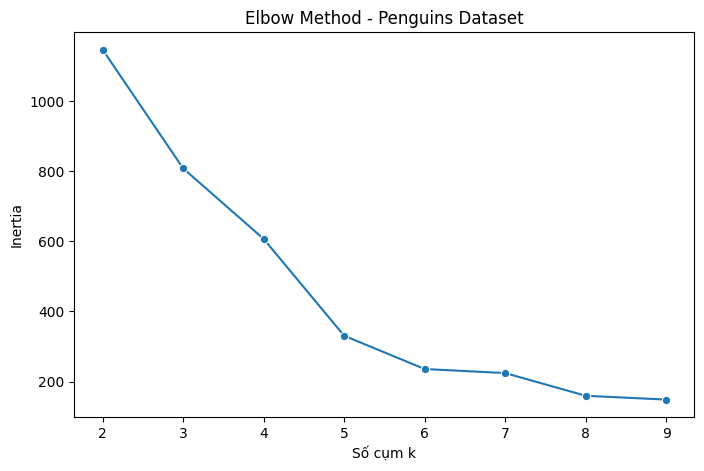

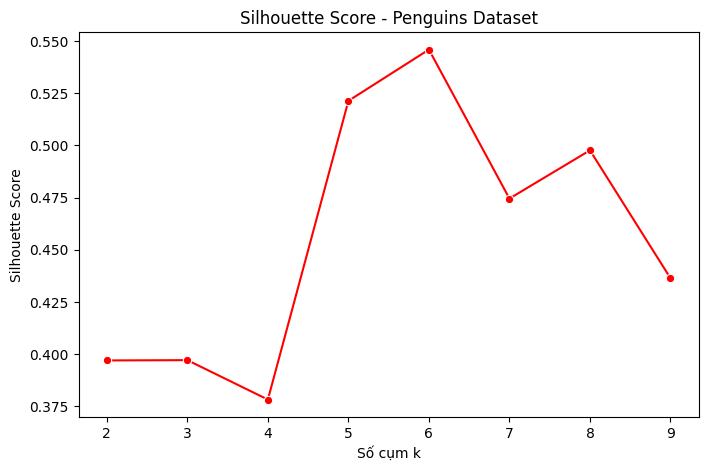

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
Cluster                                                                      
0               41.929577        18.373239         190.422535  3714.788732   
1               47.628926        15.025620         216.933884  5079.132231   
2               42.000000        20.200000        5000.000000  4250.000000   

              sex  
Cluster            
0        1.502347  
1        1.495868  
2        2.000000  


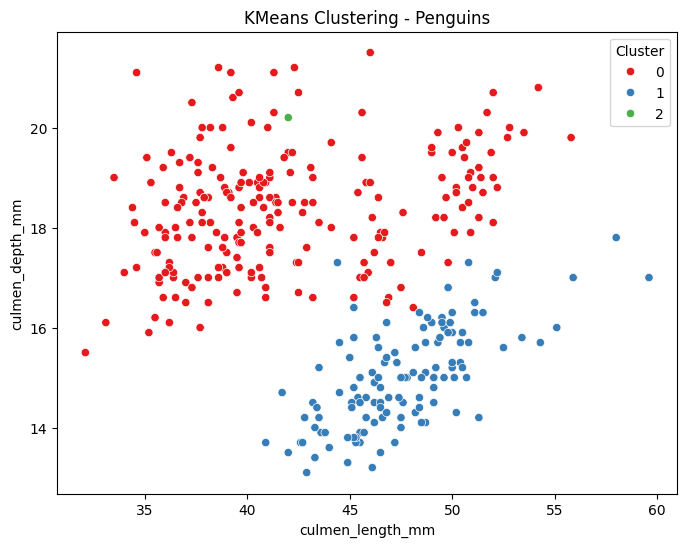

In [ ]:
# 1. Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

# 2. Đọc dữ liệu
df = pd.read_csv("penguins.csv")
print("Kích thước dữ liệu:", df.shape)
print(df.head())

# 3. Tiền xử lý dữ liệu
# Kiểm tra missing
print(df.isnull().sum())

# Xóa hàng thiếu dữ liệu
df = df.dropna()

# Encode biến phân loại (species, island, sex)
categorical_cols = df.select_dtypes(include=["object"]).columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("Sau khi xử lý:", df.info())

# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(df)

# 5. Xây dựng mô hình KMeans với nhiều k
km_inertias, km_scores = [], []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    print(f"k = {k}, Inertia = {km.inertia_:.2f}, Silhouette = {silhouette_score(X, km.labels_):.3f}")

# 6. Vẽ Elbow Method
plt.figure(figsize=(8,5))
sns.lineplot(x=range(2,10), y=km_inertias, marker="o")
plt.title("Elbow Method - Penguins Dataset")
plt.xlabel("Số cụm k")
plt.ylabel("Inertia")
plt.show()

# 7. Vẽ Silhouette Score
plt.figure(figsize=(8,5))
sns.lineplot(x=range(2,10), y=km_scores, marker="o", color="red")
plt.title("Silhouette Score - Penguins Dataset")
plt.xlabel("Số cụm k")
plt.ylabel("Silhouette Score")
plt.show()

# 8. Chọn số cụm tối ưu (ví dụ k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# 9. Phân tích cụm
print(df.groupby("Cluster").mean())

# 10. Trực quan hóa kết quả theo 2 đặc trưng chính
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="culmen_length_mm", y="culmen_depth_mm", hue="Cluster", palette="Set1")
plt.title("KMeans Clustering - Penguins")
plt.show()


**3.1.4. Bài tập thực hành 2**

Xây dựng mô hình phân cụm K-means trên tập dữ liệu mua sắm tại siêu thị. Dữ liệu lấy tại
https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering


Kích thước dữ liệu: (24721, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  

RFM head:
   CustomerID  Recency  Frequency  Monetary
0     12347.0       92         31    711.79
1     12386.0       62          8    258.90
2     12395.0      214     

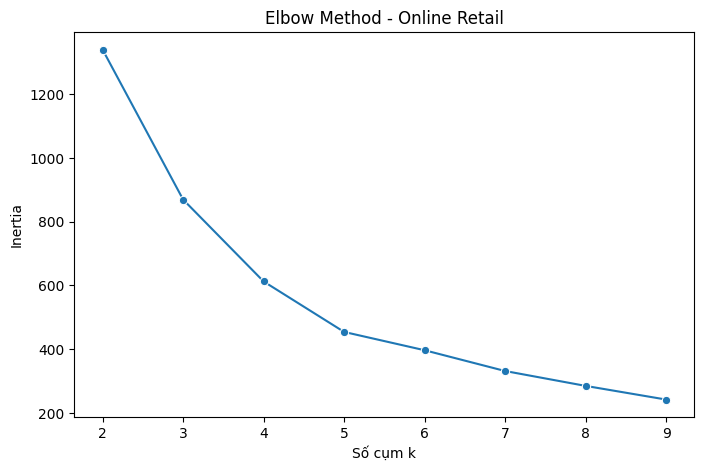

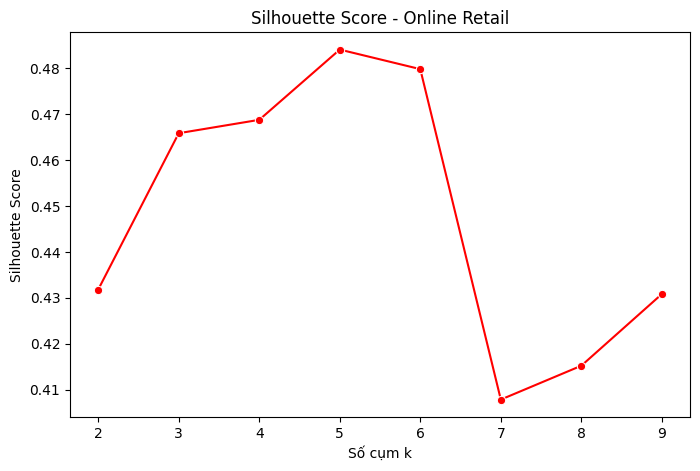


Đặc trưng trung bình của từng cụm:
           CustomerID     Recency   Frequency      Monetary
Cluster                                                    
0        15477.114155  233.242009   18.255708    373.404566
1        15511.419271   70.992188   27.377604    512.261979
2        15169.666667   81.333333  351.000000   4792.390000
3        16581.500000   16.000000   63.500000  22589.695000


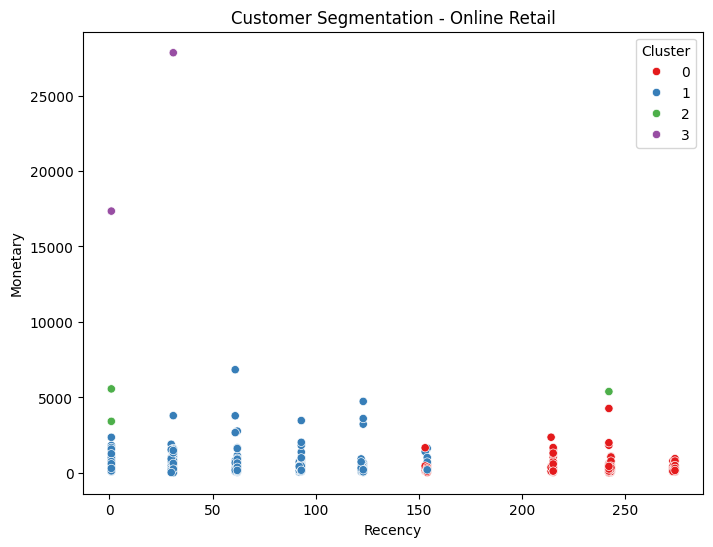

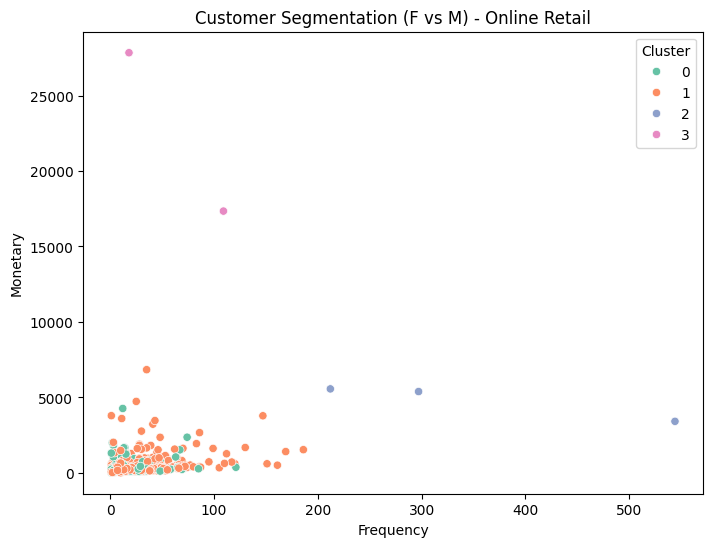

In [ ]:
# 1. Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# 2. Đọc dữ liệu
df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")
print("Kích thước dữ liệu:", df.shape)
print(df.head())

# 3. Tiền xử lý dữ liệu
# Bỏ missing CustomerID
df = df.dropna(subset=["CustomerID"])

# Bỏ các đơn Quantity <= 0
df = df[df["Quantity"] > 0]

# Thêm cột doanh thu
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Chuyển InvoiceDate về datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# 4. Xây dựng RFM cho từng khách hàng
import datetime
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,  # Recency
    "InvoiceNo": "count",                                   # Frequency
    "TotalPrice": "sum"                                     # Monetary
}).reset_index()

rfm.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalPrice": "Monetary"
}, inplace=True)

print("\nRFM head:")
print(rfm.head())

# 5. Chuẩn hóa dữ liệu RFM
scaler = StandardScaler()
X = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

# 6. Chọn số cụm tối ưu (Elbow + Silhouette)
inertias, silhouettes = [], []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X, km.labels_))
    print(f"k={k}: Inertia={km.inertia_:.2f}, Silhouette={silhouette_score(X, km.labels_):.3f}")

# Elbow method
plt.figure(figsize=(8,5))
sns.lineplot(x=range(2,10), y=inertias, marker="o")
plt.title("Elbow Method - Online Retail")
plt.xlabel("Số cụm k")
plt.ylabel("Inertia")
plt.show()

# Silhouette score
plt.figure(figsize=(8,5))
sns.lineplot(x=range(2,10), y=silhouettes, marker="o", color="red")
plt.title("Silhouette Score - Online Retail")
plt.xlabel("Số cụm k")
plt.ylabel("Silhouette Score")
plt.show()

# 7. Chạy KMeans với k=4 (thường hợp lý cho RFM)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(X)

# 8. Phân tích cụm
print("\nĐặc trưng trung bình của từng cụm:")
print(rfm.groupby("Cluster").mean())

# 9. Trực quan hóa cụm theo Recency & Monetary
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Cluster", palette="Set1")
plt.title("Customer Segmentation - Online Retail")
plt.show()

# 10. Trực quan hóa theo Frequency & Monetary
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x="Frequency", y="Monetary", hue="Cluster", palette="Set2")
plt.title("Customer Segmentation (F vs M) - Online Retail")
plt.show()


**3.2.3. Bài tập thực hành 1**
Xây dựng mô hình phân cụm đa cấp trên tập dữ liệu chim cánh cụt. Dữ liệu lấy tại
https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering

Kích thước dữ liệu: (344, 5)
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None

Số lượng g

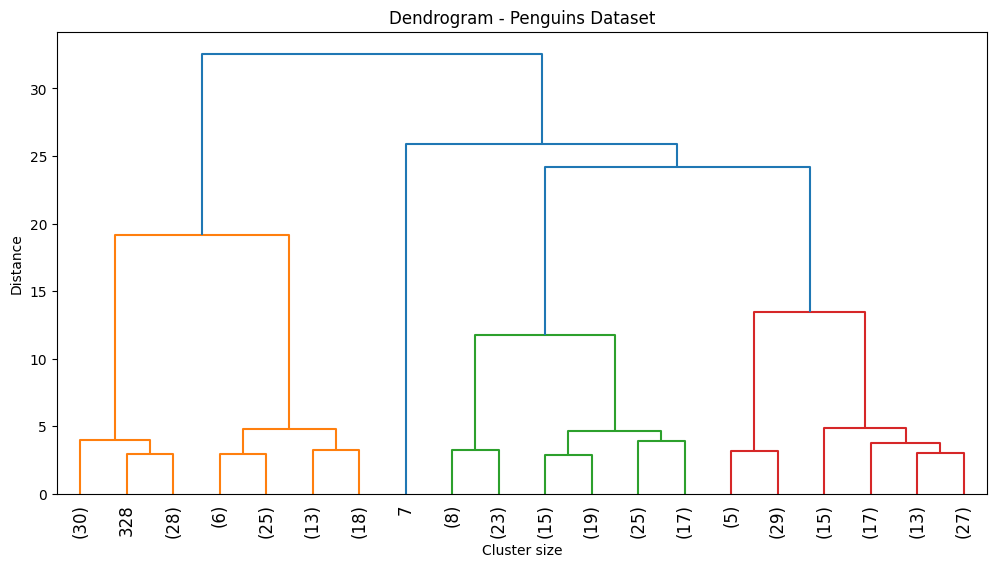

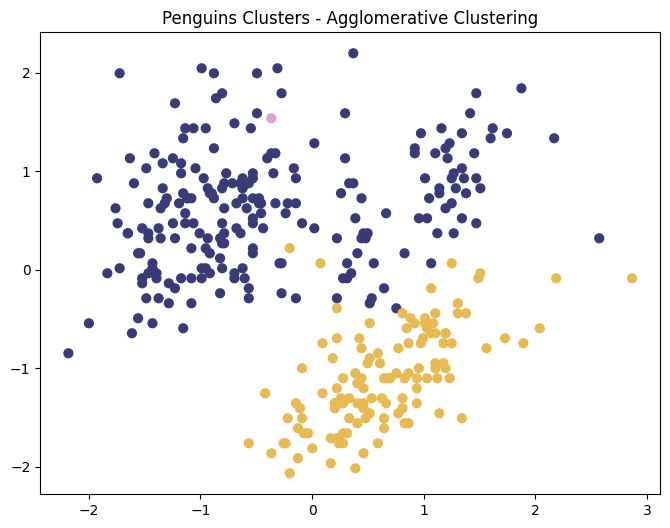

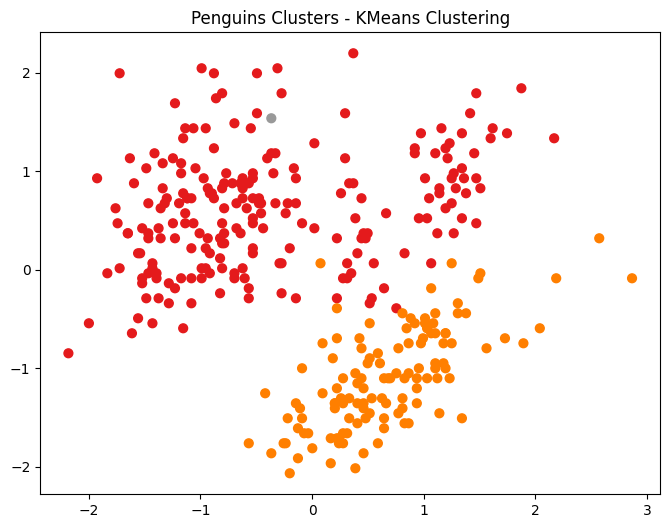


Silhouette Scores:
Agglomerative Clustering: 0.39560631008961056
KMeans Clustering: 0.397044474123945


In [ ]:
# 1. Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

# 2. Đọc dữ liệu
df = pd.read_csv("penguins.csv")
print("Kích thước dữ liệu:", df.shape)
print(df.head())
print(df.info())

# 3. Xử lý missing
print("\nSố lượng giá trị thiếu:\n", df.isnull().sum())
df = df.dropna()   # bỏ các dòng thiếu dữ liệu

# 4. Mã hóa các biến phân loại
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("\nSau khi mã hóa & làm sạch:", df.shape)

# 5. Chuẩn hóa dữ liệu (standardization)
scaler = StandardScaler()
X = scaler.fit_transform(df)

# ========================
# PHÂN CỤM ĐA CẤP (HIERARCHICAL CLUSTERING)
# ========================

# 6. Ma trận khoảng cách + dendrogram
distances = linkage(X, method="ward")
plt.figure(figsize=(12,6))
dendrogram(distances, truncate_mode="lastp", p=20, leaf_rotation=90)
plt.title("Dendrogram - Penguins Dataset")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

# 7. Agglomerative Clustering (chọn k=3 vì dataset có 3 loài chim)
ac = AgglomerativeClustering(n_clusters=3, linkage="ward")
ac_clusters = ac.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=ac_clusters, cmap="tab20b", s=40)
plt.title("Penguins Clusters - Agglomerative Clustering")
plt.show()

# ========================
# KMEANS CLUSTERING (So sánh)
# ========================
km = KMeans(n_clusters=3, random_state=42)
km_clusters = km.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=km_clusters, cmap="Set1", s=40)
plt.title("Penguins Clusters - KMeans Clustering")
plt.show()

# ========================
# SO SÁNH BẰNG SILHOUETTE
# ========================
print("\nSilhouette Scores:")
print("Agglomerative Clustering:", silhouette_score(X, ac_clusters))
print("KMeans Clustering:", silhouette_score(X, km_clusters))


**3.2.4. Bài tập thực hành 2**

Xây dựng mô hình phân cụm đa cấp trên tập dữ liệu mua sắm tại siêu thị. Dữ liệu lấy tại
https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering



Kích thước dữ liệu: (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  

--- RFM sample ---
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0    

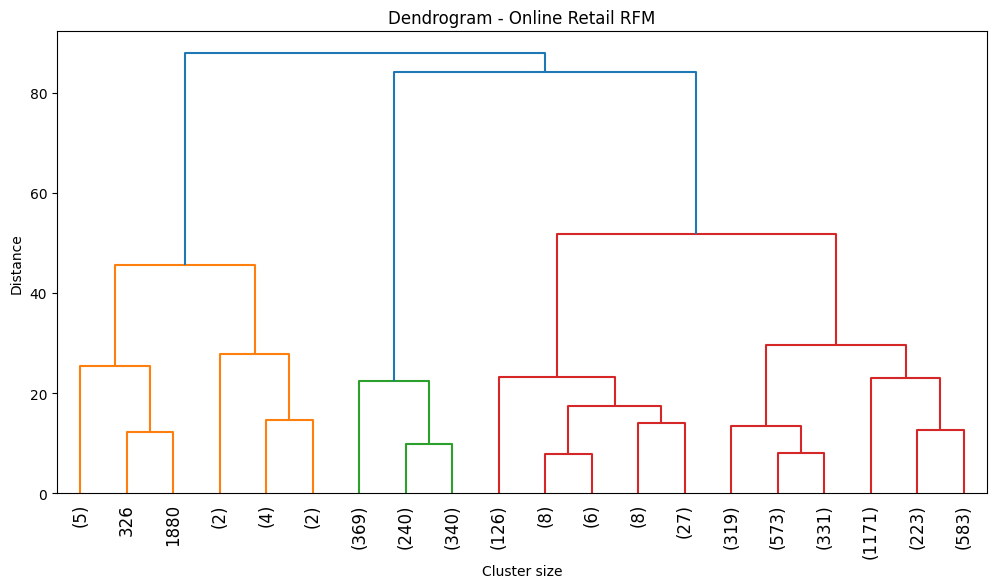

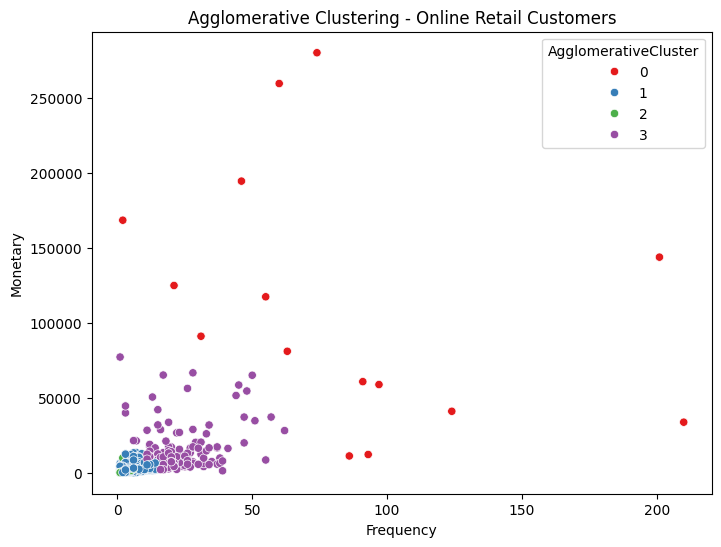

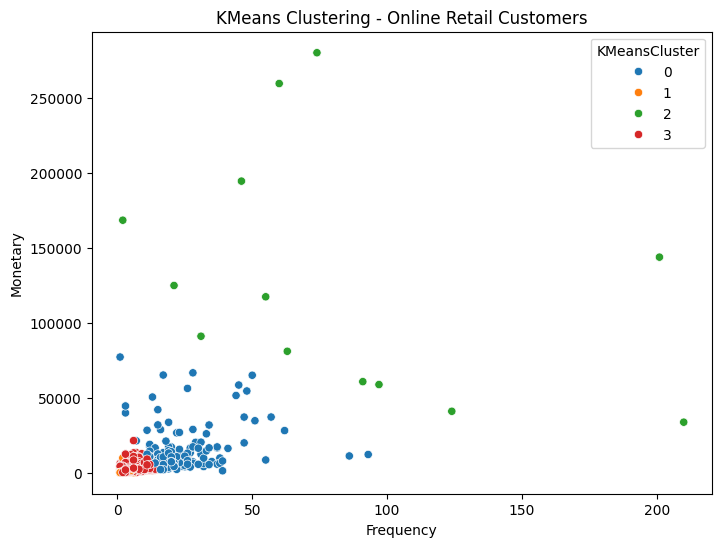


Silhouette Scores:
Agglomerative Clustering: 0.615110241323992
KMeans Clustering: 0.6161144819517276


In [ ]:
# 1. Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

# 2. Đọc dữ liệu
df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")
print("Kích thước dữ liệu:", df.shape)
print(df.head())

# 3. Tiền xử lý dữ liệu
# Bỏ missing CustomerID
df = df.dropna(subset=['CustomerID'])
# Bỏ Quantity <= 0
df = df[df['Quantity'] > 0]
# Tạo biến TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
# Đổi InvoiceDate sang datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

# 4. Tạo bảng RFM (Recency, Frequency, Monetary)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print("\n--- RFM sample ---")
print(rfm.head())

# 5. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

# 6. Dendrogram để chọn số cụm
distances = linkage(X, method="ward")
plt.figure(figsize=(12,6))
dendrogram(distances, truncate_mode="lastp", p=20, leaf_rotation=90)
plt.title("Dendrogram - Online Retail RFM")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

# 7. Agglomerative Clustering (giả sử chọn k=4 sau khi xem dendrogram)
ac = AgglomerativeClustering(n_clusters=4, linkage="ward")
ac_clusters = ac.fit_predict(X)

rfm['AgglomerativeCluster'] = ac_clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'],
                hue=rfm['AgglomerativeCluster'], palette="Set1")
plt.title("Agglomerative Clustering - Online Retail Customers")
plt.show()

# 8. So sánh với KMeans
km = KMeans(n_clusters=4, random_state=42)
km_clusters = km.fit_predict(X)
rfm['KMeansCluster'] = km_clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'],
                hue=rfm['KMeansCluster'], palette="tab10")
plt.title("KMeans Clustering - Online Retail Customers")
plt.show()

# 9. So sánh bằng Silhouette Score
print("\nSilhouette Scores:")
print("Agglomerative Clustering:", silhouette_score(X, ac_clusters))
print("KMeans Clustering:", silhouette_score(X, km_clusters))